In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# !pip install textblob
# !pip install wordcloud
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from IPython.display import Markdown, display
import os
import random
from tqdm import tqdm
from collections import defaultdict

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [13]:
data = pd.read_csv("preprocessed-file.csv")
X = data['text_final']
Y = data['tag']

In [14]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(data['text_final'],data['tag'],test_size=0.3)

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [26]:
clf = MLPClassifier(hidden_layer_sizes=(512,256,128,64,32),\
                    activation="relu",random_state=1).fit(Train_X_Tfidf, Train_Y)

y_pred = clf.predict(Test_X_Tfidf)
print(clf.score(Test_X_Tfidf, Test_Y))

C:\Users\Suyash\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.781090623774029


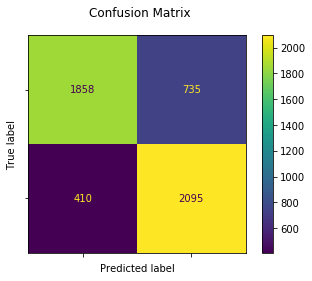

In [24]:
import matplotlib.pyplot as plt

fig=plot_confusion_matrix(clf, Test_X_Tfidf, Test_Y , display_labels=[])
fig.figure_.suptitle("Confusion Matrix")
plt.show()